In [1]:
using CSV
using DataFrames
using Dates
using Gadfly

In [2]:
ENV["COLUMNS"] = 1000;

In [3]:
data = DataFrame(CSV.File("../rawdata/md_data_2020_12_01.csv", missingstring="null"));

rename!(data,
    "Facility Name" => "hospital",
    "Modified Date" => "date",
    "COVID-19 Patients in Acute Care Beds" => "covid_active_ward",
    "COVID-19 Patients in ICU" => "covid_active_icu",
    "Physical Adult ICU Beds" => "icu_beds_total",
    "Staffed Adult ICU Beds" => "icu_beds_staffed",
    "Occupied Adult ICU Beds" => "icu_beds_occupied",
    "Physical Adult Acute Care Beds" => "ward_beds_total",
    "Staffed Adult Acute Care Beds" => "ward_beds_staffed",
    "Occupied Adult Acute Care Beds" => "ward_beds_occupied",
    "Patients in the ED" => "ed_occupied",
    "Have you expanded into non traditional spaces?" => "expanded",
    "If you have expanded, how many beds have you added?" => "expanded_amt",
    "Indicator of Clinical Staff Absenteeism" => "staff_absent",
    "Patients Under Investigation" => "active_pui",
)

parse_date(d) = Date(d, "m/d/yy") + Year(2000);
data.date = map(parse_date, data.date);

data.noncovid_active_icu  = data.icu_beds_occupied  - data.covid_active_icu
data.noncovid_active_ward = data.ward_beds_occupied - data.covid_active_ward

data.covid_active_allbeds  = coalesce.(data.covid_active_icu, 0)  + coalesce.(data.covid_active_ward, 0)
data.allbeds_beds_total    = coalesce.(data.icu_beds_total, 0)    + coalesce.(data.ward_beds_total, 0)
data.allbeds_beds_staffed  = coalesce.(data.icu_beds_staffed, 0)  + coalesce.(data.ward_beds_staffed, 0)
data.allbeds_beds_occupied = coalesce.(data.icu_beds_occupied, 0) + coalesce.(data.ward_beds_occupied, 0)

first(data, 3)

,hospital,Region,County,date,Time,covid_active_ward,covid_active_icu,Ventilators Available,Ventilators in Use,icu_beds_total,icu_beds_staffed,icu_beds_occupied,Physical Pediatric ICU Beds,Staffed Pediatric ICU Beds,Occupied Pediatric ICU Beds,ward_beds_total,ward_beds_staffed,ward_beds_occupied,Physical Pediatric Acute Care Beds,Staffed Pediatric Acute Care Beds,Occupied Pediatric Acute Care Beds,ed_occupied,expanded,expanded_amt,staff_absent,ECMO Adult Machines,ECMO Peds/Neonate Machines,active_pui,noncovid_active_icu,noncovid_active_ward,covid_active_allbeds,allbeds_beds_total,allbeds_beds_staffed,allbeds_beds_occupied
,String,String,String,Date,String,Int64?,Int64?,String,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,String,Int64?,Int64?,Int64?,Int64?,String,Int64?,Int64?,Int64,Int64,Int64,Int64
1,Anne Arundel Medical Center,Region III,Anne Arundel County,2020-03-25,,4,3,19,missing,38,30,22,0,0,0,264,230,194,10,8,1,21,No,0,1,0,0,,19,190,7,302,260,216
2,Anne Arundel Medical Center,Region III,Anne Arundel County,2020-03-26,,8,1,24,missing,30,30,24,0,0,0,230,181,181,10,8,2,17,No,0,1,0,0,,23,173,9,260,211,205
3,Anne Arundel Medical Center,Region III,Anne Arundel County,2020-03-27,,11,3,19,missing,30,30,25,0,0,0,230,185,180,10,8,3,25,No,0,1,0,0,,22,169,14,260,215,205


In [4]:
@show names(data);

names(data) = ["hospital", "Region", "County", "date", "Time ", "covid_active_ward", "covid_active_icu", "Ventilators Available", "Ventilators in Use", "icu_beds_total", "icu_beds_staffed", "icu_beds_occupied", "Physical Pediatric ICU Beds", "Staffed Pediatric ICU Beds", "Occupied Pediatric ICU Beds", "ward_beds_total", "ward_beds_staffed", "ward_beds_occupied", "Physical Pediatric Acute Care Beds", "Staffed Pediatric Acute Care Beds", "Occupied Pediatric Acute Care Beds", "ed_occupied", "expanded", "expanded_amt", "staff_absent", "ECMO Adult Machines", "ECMO Peds/Neonate Machines", "active_pui", "noncovid_active_icu", "noncovid_active_ward", "covid_active_allbeds", "allbeds_beds_total", "allbeds_beds_staffed", "allbeds_beds_occupied"]


In [5]:
start_date = Date(2020,  7, 1)
end_date   = Date(2020, 10, 1)
date_range = collect(start_date : Day(1) : end_date);

In [6]:
filter!(row -> row.date in date_range, data);

In [7]:
function mean_capacity(xs, dates)
    if all(ismissing.(xs))
        return 0
    else
        xs = [x for (x,d) in zip(xs,dates) if d in date_range]
        xs = filter(x -> !ismissing(x), xs)
        return round(Int, sum(xs) / length(xs))
    end
end;

In [8]:
function max_capacity(xs)
    if all(ismissing.(xs))
        return 0
    else
        return maximum(skipmissing(xs))
    end
end;

function min_capacity(xs)
    if all(ismissing.(xs))
        return 0
    else
        return minimum(skipmissing(xs))
    end
end;

In [9]:
capacity_data = combine(groupby(data, :hospital), [
    :icu_beds_staffed  => min_capacity => :icu_staffed_min,
    :icu_beds_total    => min_capacity => :icu_total_min,
    :ward_beds_staffed => min_capacity => :acute_staffed_min,
    :ward_beds_total   => min_capacity => :acute_total_min,
    :expanded_amt      => min_capacity => :expanded_min,

    (:icu_beds_staffed, :date)  => mean_capacity => :icu_staffed_mean,
    (:icu_beds_total, :date)    => mean_capacity => :icu_total_mean,
    (:ward_beds_staffed, :date) => mean_capacity => :acute_staffed_mean,
    (:ward_beds_total, :date)   => mean_capacity => :acute_total_mean,
    (:expanded_amt, :date)      => mean_capacity => :expanded_mean,
        
    :icu_beds_staffed  => max_capacity => :icu_staffed_max,
    :icu_beds_total    => max_capacity => :icu_total_max,
    :ward_beds_staffed => max_capacity => :acute_staffed_max,
    :ward_beds_total   => max_capacity => :acute_total_max,
    :expanded_amt      => max_capacity => :expanded_max,
]);

In [10]:
capacity_names_icu = [:icu_staffed_mean, :icu_total_mean, :icu_staffed_max, :icu_total_max, :icu_staffed_min, :icu_total_min];
capacity_names_acute = [:acute_staffed_mean, :acute_total_mean, :acute_staffed_max, :acute_total_max, :acute_staffed_min, :acute_total_min];
capacity_names_expanded = [:expanded_mean, :expanded_max, :expanded_min];

In [11]:
filter!(row -> row.icu_staffed_max + row.icu_total_max + row.acute_staffed_max + row.acute_total_max > 0, capacity_data);

In [12]:
sort!(capacity_data, :hospital);

In [13]:
hospitals = Vector(capacity_data.hospital)
N = length(hospitals)
@show hospitals;
@show N;

hospitals = ["Anne Arundel Medical Center", "Atlantic General Hospital", "Baltimore Convention Center Field Hospital", "Baltimore Washington Medical Center", "Bowie Medical Center", "Calvert Memorial Hospital", "Carroll Hospital Center", "Charles Regional (UM)", "Chestertown (UMSRH)", "Doctors Community Hospital", "Dorchester (UMSRH)", "Easton (UMSRH)", "Fort Washington ACS", "Fort Washington Hospital", "Franklin Square (MedStar)", "Frederick Memorial Hospital", "Garrett Memorial Hospital (WVU)", "Good Samaritan Hospital (MedStar)", "Grace Medical Center", "Greater Baltimore Medical Center", "Harbor Hospital (MedStar)", "Harford Memorial Hospital (UMUCH)", "Holy Cross Germantown", "Holy Cross Hospital", "Howard County General Hospital (JHM)", "Jessup Corrections ACS", "Johns Hopkins Bayview Medical Center", "Johns Hopkins Hospital", "Laurel Regional Medical Center", "Maryland Corrections Hagerstown ACS", "Mercy Medical Center", "Meritus Medical Center", "Midtown (UM)", "Montgomery Medi

In [14]:
capacity_data

,hospital,icu_staffed_min,icu_total_min,acute_staffed_min,acute_total_min,expanded_min,icu_staffed_mean,icu_total_mean,acute_staffed_mean,acute_total_mean,expanded_mean,icu_staffed_max,icu_total_max,acute_staffed_max,acute_total_max,expanded_max
,String,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,Anne Arundel Medical Center,38,38,280,326,339,39,39,285,326,339,45,45,286,326,339
2,Atlantic General Hospital,8,15,35,44,7,9,15,41,50,7,12,15,54,54,7
3,Baltimore Convention Center Field Hospital,0,0,30,222,0,0,0,30,247,0,0,0,30,252,0
4,Baltimore Washington Medical Center,23,35,180,237,0,30,35,207,237,0,35,35,239,237,0
5,Bowie Medical Center,0,0,7,20,0,0,0,13,20,0,0,0,20,20,0
6,Calvert Memorial Hospital,4,8,30,68,0,6,8,53,68,0,8,8,68,68,0
7,Carroll Hospital Center,10,12,107,147,12,10,12,112,147,12,11,12,134,147,12
8,Charles Regional (UM),10,10,96,96,0,13,13,98,98,0,15,15,101,101,0
9,Chestertown (UMSRH),0,4,5,23,0,2,4,11,23,0,2,4,15,23,0


In [15]:
capacity_data_long = stack(capacity_data, Not([:hospital]), variable_name=:capacity_name, value_name=:capacity_value);

In [16]:
capacity_data_long_icu = filter(row -> Symbol(row.capacity_name) in capacity_names_icu, capacity_data_long);
capacity_data_long_acute = filter(row -> Symbol(row.capacity_name) in capacity_names_acute, capacity_data_long);
capacity_data_long_expanded = filter(row -> Symbol(row.capacity_name) in capacity_names_expanded, capacity_data_long);

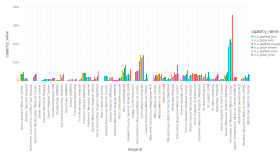

In [17]:
plot(
    capacity_data_long_icu,
    x=:hospital,
    color=:capacity_name,
    y=:capacity_value,
    Geom.bar(position=:dodge),
) |> SVG(28cm, 16cm)

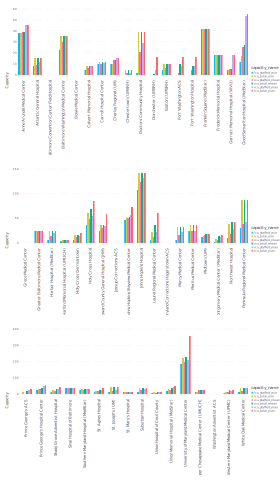

In [18]:
plot_splits = 3
plot_split_length = Int(ceil(N / plot_splits))

subplots = Plot[]
for i in 0:plot_splits-1
    split_hospitals = hospitals[(i*plot_split_length)+1:min(N,((i+1)*plot_split_length))]
    capacity_data_long_icu_ = filter(row -> row.hospital in split_hospitals, capacity_data_long_icu)
    plt = plot(
        capacity_data_long_icu_,
        x=:capacity_name,
        color=:capacity_name,
        y=:capacity_value,
        xgroup=:hospital,
        Geom.subplot_grid(Geom.bar(position=:dodge), Guide.xticks(ticks=[])),
        Guide.xlabel(""),
        Guide.ylabel("Capacity"),
    )
    push!(subplots, plt)
end
plt = vstack(subplots)
plt |> SVG(28cm, 16cm * plot_splits)

In [19]:
capacity_data_output = select(capacity_data, :hospital, :icu_staffed_mean => :capacity_icu, :acute_staffed_mean => :capacity_acute);

In [20]:
capacity_data_output |> CSV.write("../data/capacity_maryland.csv");